In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from scipy.optimize import curve_fit

In [13]:
def euclidDist(x1, y1, x2, y2):
    return np.sqrt(np.square(x2-x1) + np.square(y2-y1))

def transformX(xy, alpha, beta, gamma, theta, phi, psi, z):
    xout = gamma*(xy[:,0]*np.cos(theta) - xy[:,1]*np.sin(theta) + alpha)
    xout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
#    xout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
    return xout

def transformY(xy, alpha, beta, gamma, theta, phi, psi, z):
    yout = gamma*(xy[:,0]*np.sin(theta) + xy[:,1]*np.cos(theta) + beta)
    yout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
#    yout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
    return yout

def transformXSides(xy, alpha, beta, gamma, theta, phi, psi, z, alpha2, beta2, gamma2, theta2, phi2, psi2, z2):
    xout = np.zeros(xy.shape[0])
    for i in range(xy.shape[0]):
        if xy[i,0]<0:
            xout[i] = gamma*(xy[i,0]*np.cos(theta) - xy[i,1]*np.sin(theta) + alpha)
            xout[i] = 1./z*np.sqrt((z+xy[i,0]*np.sin(phi))*(z+xy[i,1]*np.sin(psi)))*xout[i]
    
        else:
            xout[i] = gamma2*(xy[i,0]*np.cos(theta2) - xy[i,1]*np.sin(theta2) + alpha2)
            xout[i] = 1./z2*np.sqrt((z2+xy[i,0]*np.sin(phi2))*(z2+xy[i,1]*np.sin(psi2)))*xout[i]

    return xout

def transformYSides(xy, alpha, beta, gamma, theta, phi, psi, z, alpha2, beta2, gamma2, theta2, phi2, psi2, z2):
    yout = np.zeros(xy.shape[0])
    for i in range(xy.shape[0]):
        if xy[i,0]<0:
            yout[i] = gamma*(xy[i,0]*np.sin(theta) + xy[i,1]*np.cos(theta) + beta)
            yout[i] = 1./z*np.sqrt((z+xy[i,0]*np.sin(phi))*(z+xy[i,1]*np.sin(psi)))*yout[i]
    
        else:
            yout[i] = gamma2*(xy[i,0]*np.sin(theta2) + xy[i,1]*np.cos(theta2) + beta2)
            yout[i] = 1./z2*np.sqrt((z2+xy[i,0]*np.sin(phi2))*(z2+xy[i,1]*np.sin(psi2)))*yout[i]
            
    return yout


def transfoShearRotateX(xy, alpha, beta, theta, vx, vy, m, n, phi, psi, z, gamma):
    xout = xy[:,0]*(vx*np.cos(theta)+m*np.sin(theta)) + xy[:,1]*(-vx*np.sin(theta)+m*np.cos(theta))+alpha
    xout = 1.*gamma/z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
    return xout

def transfoShearRotateY(xy, alpha, beta, theta, vx, vy, m, n, phi, psi, z, gamma):
    yout = xy[:,0]*(n*np.cos(theta)+vy*np.sin(theta)) + xy[:,1]*(-n*np.sin(theta)+vy*np.cos(theta))+beta
    yout = 1.*gamma/z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
    return yout


In [78]:
#dataRaw = pd.read_csv('calibTestOutputVincent_20170213_16h58.txt')
dataRaw = pd.read_csv('calibDataOutput_visualAxis_Marie_20180307_10h02.txt')

data = dataRaw[5:]
print(len(data))

1763


<IPython.core.display.Javascript object>


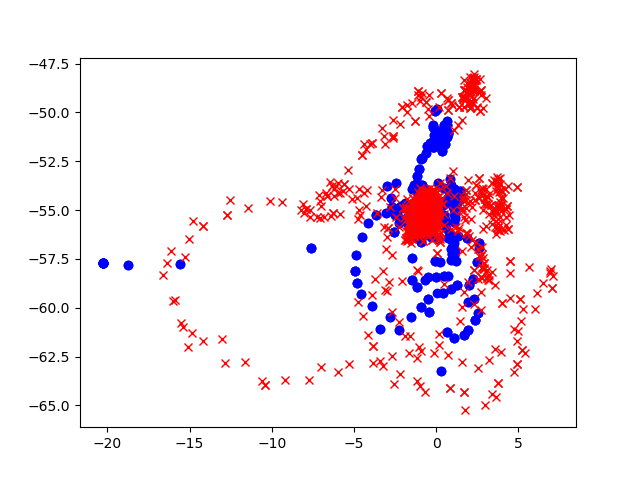

In [71]:
%matplotlib notebook
plt.plot(data['outputApplyX'], data['outputApplyY'],'bo')
plt.plot(data['targetX'], data['targetY'], 'rx')
plt.show()

In [79]:
xtmp = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
ytmp = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
xy = np.concatenate((xtmp, ytmp), axis=1)

Xtarget = data['targetX']
Ytarget = data['targetY']

In [80]:
# Split the data according to the target value : TargetX < 0 or Target > 0
xyleft = xy[np.where(Xtarget < 0)]
Xtargetleft = data.targetX[data.targetX < 0]
Ytargetleft = data.targetY[data.targetX < 0]

xyright = xy[np.where(Xtarget > 0)]
Xtargetright = data.targetX[data.targetX > 0]
Ytargetright = data.targetY[data.targetX > 0]

In [81]:
xy.shape

(1763, 2)

coefs after fit on Y: [  0.         -40.13274522   0.92430241   1.           0.5983189
   0.          -0.5755948    0.29584881   1.56782225 154.97704374
   0.80893244]
coefs after fit on X: [-14.53270488   0.           0.53873888   0.64418368   1.
   0.29393844   0.           0.21401177  -0.10100159  47.69118326
   0.2312517 ]
MSE on X rigig transfo fit:  3.639343516596471
MSE on X poly fit:  6.256502004182674
MSE on y rigig transfo fit:  1.6671061108132053
MSE on y poly fit:  2.687598362728604
mean distance rigid fit:  1.5092180480260609
mean distance poly fit:  1.8783241798464045
median distance rigid fit:  0.8427764883627885
median distance poly fit:  0.9377425003400455


C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Javascript object>


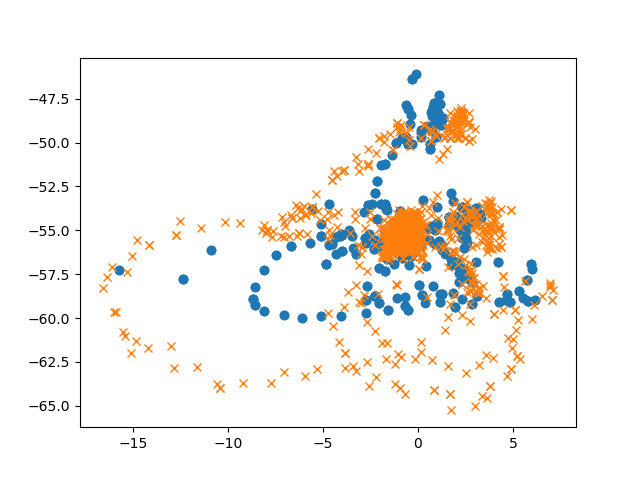

In [75]:
from scipy.optimize import curve_fit

#init_vals = [0, 0, 1, 0, 0, 0, 100]

init_vals = [0, 0, 1, 1, 1, 0, 0, 0, 0, 100, 1]
best_valsTotY, covar = curve_fit(transfoShearRotateY, xy, Ytarget, p0=init_vals)
print("coefs after fit on Y:", best_valsTotY)

init_vals = [0, 0, 0, 1, 1, 0, 0, 0, 0, 100, 1]
best_valsTotX, covar = curve_fit(transfoShearRotateX, xy, Xtarget, p0=init_vals)
print("coefs after fit on X:", best_valsTotX)

MSEx = np.mean(np.square(transfoShearRotateX(xy, *best_valsTotX)-Xtarget))
MSEy = np.mean(np.square(transfoShearRotateY(xy, *best_valsTotY)-Ytarget))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

print('MSE on X rigig transfo fit: ', MSEx)
print('MSE on X poly fit: ', MSEpolyx)

print('MSE on y rigig transfo fit: ', MSEy)
print('MSE on y poly fit: ', MSEpolyy)

meanDistRigid = np.mean(euclidDist(Xtarget, Ytarget, transfoShearRotateX(xy, *best_valsTotX), transfoShearRotateY(xy, *best_valsTotY)))
meanDistPoly = np.mean(euclidDist(Xtarget, Ytarget, data['outputEvalX'], data['outputEvalY']))

print('mean distance rigid fit: ',meanDistRigid)
print('mean distance poly fit: ',meanDistPoly)

medianDistRigid = np.median(euclidDist(Xtarget, Ytarget, transfoShearRotateX(xy, *best_valsTotX), transfoShearRotateY(xy, *best_valsTotY)))
medianDistPoly = np.median(euclidDist(Xtarget, Ytarget, data['outputEvalX'], data['outputEvalY']))

print('median distance rigid fit: ',medianDistRigid)
print('median distance poly fit: ',medianDistPoly)


%matplotlib notebook
plt.plot(transfoShearRotateX(xy, *best_valsTotX), transfoShearRotateY(xy, *best_valsTotY), 'o')
plt.plot(data['targetX'], data['targetY'],'x')
plt.show()

In [ ]:
from scipy.optimize import curve_fit

init_vals = [0, 0, 1, 0, 0, 0, 200, 0, 0, 1, 0, 0, 0, 200]
best_valsY, covar = curve_fit(transformYSides, xy, Ytarget, p0=init_vals)
print("coefs after fit on Y:", best_valsY)

init_vals = [0, 0, 1, 0, 0, 0, 10, 0, 0, 1, 0, 0, 0, 10]
best_valsX, covar = curve_fit(transformXSides, xy, Xtarget, p0=init_vals)
print("coefs after fit on X:", best_valsX)

MSEx = np.mean(np.square(transformXSides(xy, *best_valsX)-Xtarget))
MSEy = np.mean(np.square(transformYSides(xy, *best_valsY)-Ytarget))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

meanDistRigid = np.mean(euclidDist(Xtarget, Ytarget, transformXSides(xy, *best_valsX), transformYSides(xy, *best_valsY)))
meanDistPoly = np.mean(euclidDist(Xtarget, Ytarget, data['outputEvalX'], data['outputEvalY']))

medianDistRigid = np.median(euclidDist(Xtarget, Ytarget, transformXSides(xy, *best_valsX), transformYSides(xy, *best_valsY)))
medianDistPoly = np.median(euclidDist(Xtarget, Ytarget, data['outputEvalX'], data['outputEvalY']))

print('MSE on X rigig transfo fit: ', MSEx)
print('MSE on y rigig transfo fit: ', MSEy)
print('mean distance rigid fit: ',meanDistRigid)
print('median distance rigid fit: ',medianDistRigid)

print('MSE on X poly fit: ', MSEpolyx)
print('MSE on y poly fit: ', MSEpolyy)
print('mean distance poly fit: ',meanDistPoly)
print('median distance poly fit: ',medianDistPoly)

%matplotlib notebook
plt.plot(transformXSides(xy, *best_valsX), transformYSides(xy, *best_valsY), 'o')
plt.plot(data['targetX'], data['targetY'],'x')
plt.show()

In [ ]:
# Perform the fit on each side
init_vals = [0, 0, 1, 0, 0, 0, 100]
best_valsYleft, covar = curve_fit(transformY, xyleft, Ytargetleft, p0=init_vals)
print("coefs after fit on Yleft:", best_valsYleft)

best_valsYright, covar = curve_fit(transformY, xyright, Ytargetright, p0=init_vals)
print("coefs after fit on Yright:", best_valsYright)

best_valsXleft, covar = curve_fit(transformX, xyleft, Xtargetleft, p0=init_vals)
print("coefs after fit on Xleft:", best_valsXleft)

best_valsXright, covar = curve_fit(transformX, xyright, Xtargetright, p0=init_vals)
print("coefs after fit on Xright:", best_valsXright)


MSExleft = np.mean(np.square(transformX(xyleft, *best_valsXleft)-Xtargetleft))
MSEyleft = np.mean(np.square(transformY(xyleft, *best_valsYleft)-Ytargetleft))

MSExright = np.mean(np.square(transformX(xyright, *best_valsXright)-Xtargetright))
MSEyright = np.mean(np.square(transformY(xyright, *best_valsYright)-Ytargetright))


MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))


print('MSE on X rigig transfo fit: ', MSExleft)
print('MSE on X rigig transfo fit: ', MSExright)
print('MSE on X poly fit: ', MSEpolyx)

print('MSE on y rigig transfo fit: ', MSEyleft)
print('MSE on y rigig transfo fit: ', MSEyright)
print('MSE on y poly fit: ', MSEpolyy)

In [ ]:
%matplotlib notebook

plt.plot(transformX(xyleft, *best_valsXleft), transformY(xyleft, *best_valsYleft), 'bo')
plt.plot(transformX(xyright, *best_valsXright), transformY(xyright, *best_valsYright), 'bo')
plt.plot(Xtargetleft, Ytargetleft, 'rx', Xtargetright, Ytargetright, 'rx')
plt.show()

In [83]:
# Split the data into 4 parts
xyuleft = xy[np.where((Xtarget < 0) & (Ytarget > 0))]
xydleft = xy[np.where((Xtarget < 0) & (Ytarget < 0))]
xyuright = xy[np.where((Xtarget > 0) & (Ytarget > 0))]
xydright = xy[np.where((Xtarget > 0) & (Ytarget < 0))]

Xtargetuleft = data.targetX[(data.targetX < 0) & (data.targetY > 0)]
Xtargetdleft = data.targetX[(data.targetX < 0) & (data.targetY < 0)]
Xtargeturight = data.targetX[(data.targetX > 0) & (data.targetY > 0)]
Xtargetdright = data.targetX[(data.targetX > 0) & (data.targetY < 0)]

Ytargetuleft = data.targetY[(data.targetX < 0) & (data.targetY > 0)]
Ytargetdleft = data.targetY[(data.targetX < 0) & (data.targetY < 0)]
Ytargeturight = data.targetY[(data.targetX > 0) & (data.targetY > 0)]
Ytargetdright = data.targetY[(data.targetX > 0) & (data.targetY < 0)]

In [89]:
# Perform the fit on each quarter
init_vals = [0, 0, 1, 0, 0, 0, 500]
best_valsYuleft, covar = curve_fit(transformY, xyuleft, Ytargetuleft, p0=init_vals)
print("coefs after fit on Yuleft:", best_valsYuleft)

best_valsYuright, covar = curve_fit(transformY, xyuright, Ytargeturight, p0=init_vals)
print("coefs after fit on Yuright:", best_valsYuright)

best_valsXuleft, covar = curve_fit(transformX, xyuleft, Xtargetuleft, p0=init_vals)
print("coefs after fit on Xuleft:", best_valsXuleft)

best_valsXuright, covar = curve_fit(transformX, xyuright, Xtargeturight, p0=init_vals)
print("coefs after fit on Xuright:", best_valsXuright)

best_valsYdleft, covar = curve_fit(transformY, xydleft, Ytargetdleft, p0=init_vals)
print("coefs after fit on Ydleft:", best_valsYdleft)

best_valsYdright, covar = curve_fit(transformY, xydright, Ytargetdright, p0=init_vals)
print("coefs after fit on Ydright:", best_valsYdright)

best_valsXdleft, covar = curve_fit(transformX, xydleft, Xtargetdleft, p0=init_vals)
print("coefs after fit on Xdleft:", best_valsXdleft)

best_valsXdright, covar = curve_fit(transformX, xydright, Xtargetdright, p0=init_vals)
print("coefs after fit on Xdright:", best_valsXdright)



MSExuleft = np.mean(np.square(transformX(xyuleft, *best_valsXuleft)-Xtargetuleft))
MSEyuleft = np.mean(np.square(transformY(xyuleft, *best_valsYuleft)-Ytargetuleft))
MSExuright = np.mean(np.square(transformX(xyuright, *best_valsXuright)-Xtargeturight))
MSEyuright = np.mean(np.square(transformY(xyuright, *best_valsYuright)-Ytargeturight))

MSExdleft = np.mean(np.square(transformX(xydleft, *best_valsXdleft)-Xtargetdleft))
MSEydleft = np.mean(np.square(transformY(xydleft, *best_valsYdleft)-Ytargetdleft))
MSExdright = np.mean(np.square(transformX(xydright, *best_valsXdright)-Xtargetdright))
MSEydright = np.mean(np.square(transformY(xydright, *best_valsYdright)-Ytargetdright))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

MSEx = (MSExuleft*xyuleft.shape[0] + MSExuright*xyuright.shape[0] + MSExdleft*xydleft.shape[0] + MSExdright*xydright.shape[0])
MSEx = 1.*MSEx/xy.shape[0]
MSEy = (MSEyuleft*xyuleft.shape[0] + MSEyuright*xyuright.shape[0] + MSEydleft*xydleft.shape[0] + MSEydright*xydright.shape[0])
MSEy = 1.*MSEy/xy.shape[0]

print('MSE on X uleft rigig transfo fit: ', MSExuleft)
print('MSE on X uright rigig transfo fit: ', MSExuright)
print('MSE on X dleft rigig transfo fit: ', MSExdleft)
print('MSE on X dright rigig transfo fit: ', MSExdright)
print('MSE on X rigid transfo fit: ', MSEx)

print('MSE on X poly fit: ', MSEpolyx)


print('MSE on y uleft rigig transfo fit: ', MSEyuleft)
print('MSE on y uright rigig transfo fit: ', MSEyuright)
print('MSE on y dleft rigig transfo fit: ', MSEydleft)
print('MSE on y dright rigig transfo fit: ', MSEydright)
print('MSE on Y rigid transfo fit: ', MSEy)

print('MSE on y poly fit: ', MSEpolyy)

coefs after fit on Yuleft: [  0.          34.79372166   0.38197166   0.25509888  -7.85398169
   1.57079632 101.70400082]


C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
C:\Users\vdel\Anaconda3\envs\tensorflow\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

In [ ]:
%matplotlib notebook

plt.plot(transformX(xyuleft, *best_valsXuleft), transformY(xyuleft, *best_valsYuleft), 'bo')
plt.plot(transformX(xyuright, *best_valsXuright), transformY(xyuright, *best_valsYuright), 'bo')
plt.plot(transformX(xydleft, *best_valsXdleft), transformY(xydleft, *best_valsYdleft), 'bo')
plt.plot(transformX(xydright, *best_valsXdright), transformY(xydright, *best_valsYdright), 'bo')
plt.plot(Xtarget, Ytarget, 'rx')
plt.show()